In [1]:
# librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#! pip install missingno
import missingno as msno 
# !pip install chardet
import chardet


In [2]:
# Leer los primeros 10000 bytes del archivo para detectar la codificación
with open('Terrazas_202104.csv', 'rb') as f:
    result = chardet.detect(f.read(10000))
    print(result)  # Esto mostrará la codificación detectada

{'encoding': 'Johab', 'confidence': 0.99, 'language': 'Korean'}


In [3]:
# leer los datos de Terrazas_202104.csv
terrazas_pd = pd.read_csv('Terrazas_202104.csv', delimiter=';', encoding='ISO-8859-1')
terrazas_pd.sample(10)

,id_terraza,id_local,id_distrito_local,desc_distrito_local,id_barrio_local,desc_barrio_local,id_ndp_edificio,id_clase_ndp_edificio,id_vial_edificio,clase_vial_edificio,...,hora_ini_VS_es,hora_fin_VS_es,hora_ini_VS_ra,hora_fin_VS_ra,mesas_aux_es,mesas_aux_ra,mesas_es,mesas_ra,sillas_es,sillas_ra
1531,2394,270544504,15,CIUDAD LINEAL,1501,VENTAS,11103816,1,698500,CALLE,...,08:00:00,01:30:00,10:00:00,00:00:00,0,NaN,8,NaN,32,
5906,18291,270181900,17,VILLAVERDE,1701,SAN ANDRES,11125441,1,425250,CALLE,...,08:00:00,01:30:00,08:00:00,01:00:00,0,0.0,6,6.0,24,
1321,2042,270530885,1,CENTRO,105,UNIVERSIDAD,11006751,1,253800,CALLE,...,10:00:00,02:00:00,10:00:00,23:00:00,0,0.0,7,7.0,21,
1094,1685,270048948,1,CENTRO,105,UNIVERSIDAD,11006217,1,661700,CALLE,...,10:00:00,02:30:00,10:00:00,00:00:00,0,0.0,2,2.0,6,
1115,1717,280060941,18,VILLA DE VALLECAS,1803,ENSANCHE DE VALLECAS,31022194,1,2255,CALLE,...,10:00:00,02:30:00,10:00:00,00:00:00,0,0.0,9,9.0,36,
2478,3917,270223792,1,CENTRO,105,UNIVERSIDAD,11005817,1,143000,PLAZA,...,10:00:00,01:30:00,10:00:00,23:00:00,0,0.0,4,4.0,12,
938,1439,285034092,13,PUENTE DE VALLECAS,1301,ENTREVIAS,11089611,1,576100,CALLE,...,10:00:00,02:30:00,10:00:00,00:00:00,0,0.0,0,18.0,0,
5545,17903,60001115,6,TETUAN,602,CUATRO CAMINOS,11029277,1,550500,CALLE,...,10:00:00,01:30:00,10:00:00,23:30:00,0,0.0,18,18.0,72,
5682,18048,285001084,4,SALAMANCA,406,CASTELLANA,11020153,1,773000,CALLE,...,10:00:00,00:00:00,10:00:00,00:00:00,0,0.0,4,4.0,9,
1909,3046,100001617,10,LATINA,1002,PUERTA DEL ANGEL,11062515,1,285200,PASEO,...,10:00:00,02:30:00,10:00:00,00:00:00,0,0.0,5,5.0,20,


In [4]:
# Dimensiones y tipos de datos del dataset

terrazas_pd.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6275 entries, 0 to 6274
Data columns (total 57 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id_terraza                      6275 non-null   int64  
 1   id_local                        6275 non-null   int64  
 2   id_distrito_local               6275 non-null   int64  
 3   desc_distrito_local             6275 non-null   object 
 4   id_barrio_local                 6275 non-null   int64  
 5   desc_barrio_local               6275 non-null   object 
 6   id_ndp_edificio                 6275 non-null   int64  
 7   id_clase_ndp_edificio           6275 non-null   int64  
 8   id_vial_edificio                6275 non-null   int64  
 9   clase_vial_edificio             6275 non-null   object 
 10  desc_vial_edificio              6275 non-null   object 
 11  nom_edificio                    6275 non-null   object 
 12  num_edificio                    62

In [5]:
# valores nulos
terrazas_pd.isnull().sum()

id_terraza                           0
id_local                             0
id_distrito_local                    0
desc_distrito_local                  0
id_barrio_local                      0
desc_barrio_local                    0
id_ndp_edificio                      0
id_clase_ndp_edificio                0
id_vial_edificio                     0
clase_vial_edificio                  0
desc_vial_edificio                   0
nom_edificio                         0
num_edificio                         0
Cod_Postal                           0
coordenada_x_local                   0
coordenada_y_local                   0
id_tipo_acceso_local                 0
desc_tipo_acceso_local               0
id_situacion_local                   0
desc_situacion_local                 0
secuencial_local_PC                  0
Escalera                          6272
id_planta_agrupado                   8
id_local_agrupado                 6178
coordenada_x_agrupacion           6183
coordenada_y_agrupacion  

In [6]:
# Mostar todas las columnas del dataset
pd.set_option('display.max_columns', None)
terrazas_pd.describe(include='all')


,id_terraza,id_local,id_distrito_local,desc_distrito_local,id_barrio_local,desc_barrio_local,id_ndp_edificio,id_clase_ndp_edificio,id_vial_edificio,clase_vial_edificio,desc_vial_edificio,nom_edificio,num_edificio,Cod_Postal,coordenada_x_local,coordenada_y_local,id_tipo_acceso_local,desc_tipo_acceso_local,id_situacion_local,desc_situacion_local,secuencial_local_PC,Escalera,id_planta_agrupado,id_local_agrupado,coordenada_x_agrupacion,coordenada_y_agrupacion,rotulo,id_periodo_terraza,desc_periodo_terraza,id_situacion_terraza,desc_situacion_terraza,Superficie_ES,Superficie_RA,Fecha_confir_ult_decreto_resol,id_ndp_terraza,id_clase_ndp_terraza,ID_VIAL,DESC_CLASE,DESC_NOMBRE,nom_terraza,num_terraza,cal_terraza,desc_ubicacion_terraza,hora_ini_LJ_es,hora_fin_LJ_es,hora_ini_LJ_ra,hora_fin_LJ_ra,hora_ini_VS_es,hora_fin_VS_es,hora_ini_VS_ra,hora_fin_VS_ra,mesas_aux_es,mesas_aux_ra,mesas_es,mesas_ra,sillas_es,sillas_ra
count,6275.000000,6.275000e+03,6275.000000,6275,6275.000000,6275,6.275000e+03,6275.0,6.275000e+03,6275,6275,6275,6275.000000,6275.000000,6275,6275,6275.000000,6275,6275.000000,6275,6275.000000,3,6267,97,92,92,6275,6275.000000,6275,6275.000000,6275,6275,4809,6275,6.275000e+03,6275.0,6.275000e+03,6275,6275,6275,6275.000000,6275,6275,6275,6275,4809,4809,6275,6275,4809,4809,6275.000000,4770.000000,6275.000000,4770.00000,6275.000000,6275
unique,NaN,NaN,NaN,21,NaN,128,NaN,NaN,NaN,18,1748,1,NaN,NaN,5532,5838,NaN,6,NaN,3,NaN,2,9,72,53,53,5476,NaN,2,NaN,2,2999,2499,1296,NaN,NaN,NaN,18,1704,1,NaN,12,9,14,22,12,16,18,20,13,17,NaN,NaN,NaN,NaN,NaN,12
top,NaN,NaN,NaN,CENTRO,NaN,SOL,NaN,NaN,NaN,CALLE,ALCALA ...,NUM,NaN,NaN,0,0,NaN,Puerta Calle,NaN,Abierto,NaN,1,PB,1,0,0,BAR,NaN,Anual,NaN,Abierta,"19,44","19,44",05/12/2016,NaN,NaN,NaN,CALLE,ALCALA ...,NUM,NaN,,Acera,10:00:00,01:00:00,10:00:00,00:00:00,10:00:00,02:30:00,10:00:00,00:00:00,NaN,NaN,NaN,NaN,NaN,
freq,NaN,NaN,NaN,765,NaN,193,NaN,NaN,NaN,4769,85,6275,NaN,NaN,101,101,NaN,6158,NaN,6203,NaN,2,6233,6,11,11,58,NaN,4712,NaN,6244,83,59,375,NaN,NaN,NaN,4648,93,6275,NaN,5765,4416,4079,3208,3024,2650,4083,2657,3021,2576,NaN,NaN,NaN,NaN,NaN,5828
mean,6502.435857,2.332854e+08,8.302948,NaN,833.837291,NaN,1.375439e+07,1.0,6.211270e+06,NaN,NaN,NaN,42.963506,28022.165737,NaN,NaN,1.000319,NaN,1.044781,NaN,21.768446,NaN,NaN,NaN,NaN,NaN,NaN,1.249084,NaN,1.034582,NaN,NaN,NaN,NaN,1.472731e+07,1.0,6.220813e+06,NaN,NaN,NaN,43.550120,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.040956,0.038155,9.707092,9.12956,31.628048,NaN
std,5812.332668,8.261088e+07,5.743357,NaN,574.299026,NaN,5.860928e+06,0.0,2.050614e+07,NaN,NaN,NaN,62.251230,15.136546,NaN,NaN,0.328247,NaN,0.463940,NaN,20.602166,NaN,NaN,NaN,NaN,NaN,NaN,0.432517,NaN,0.490830,NaN,NaN,NaN,NaN,6.653664e+06,0.0,2.054970e+07,NaN,NaN,NaN,64.028782,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.358528,0.257842,11.353575,7.15089,24.537851,NaN
min,7.000000,1.000000e+07,1.000000,NaN,101.000000,NaN,1.100000e+07,1.0,1.270000e+02,NaN,NaN,NaN,1.000000,28001.000000,NaN,NaN,0.000000,NaN,1.000000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,1.000000,NaN,NaN,NaN,NaN,1.100000e+07,1.0,1.270000e+02,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.00000,0.000000,NaN
25%,2462.000000,2.700573e+08,4.000000,NaN,401.000000,NaN,1.101840e+07,1.0,2.138000e+05,NaN,NaN,NaN,8.000000,28009.000000,NaN,NaN,1.000000,NaN,1.000000,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,1.000000,NaN,NaN,NaN,NaN,1.102020e+07,1.0,2.170000e+05,NaN,NaN,NaN,8.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,5.000000,5.00000,15.500000,NaN
50%,4913.000000,2.703555e+08,7.000000,NaN,704.000000,NaN,1.104649e+07,1.0,4.266850e+05,NaN,NaN,NaN,21.000000,28019.000000,NaN,NaN,1.000000,NaN,1.000000,NaN,20.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,1.000000,NaN,NaN,NaN,NaN,1.106539e+07,1.0,4.273000e+05,NaN,NaN,NaN,22.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,8.000000,8.00000,24.000000,NaN
75%,6965.000000,2.800076e+08,13.000000,NaN,1302

<Axes: >

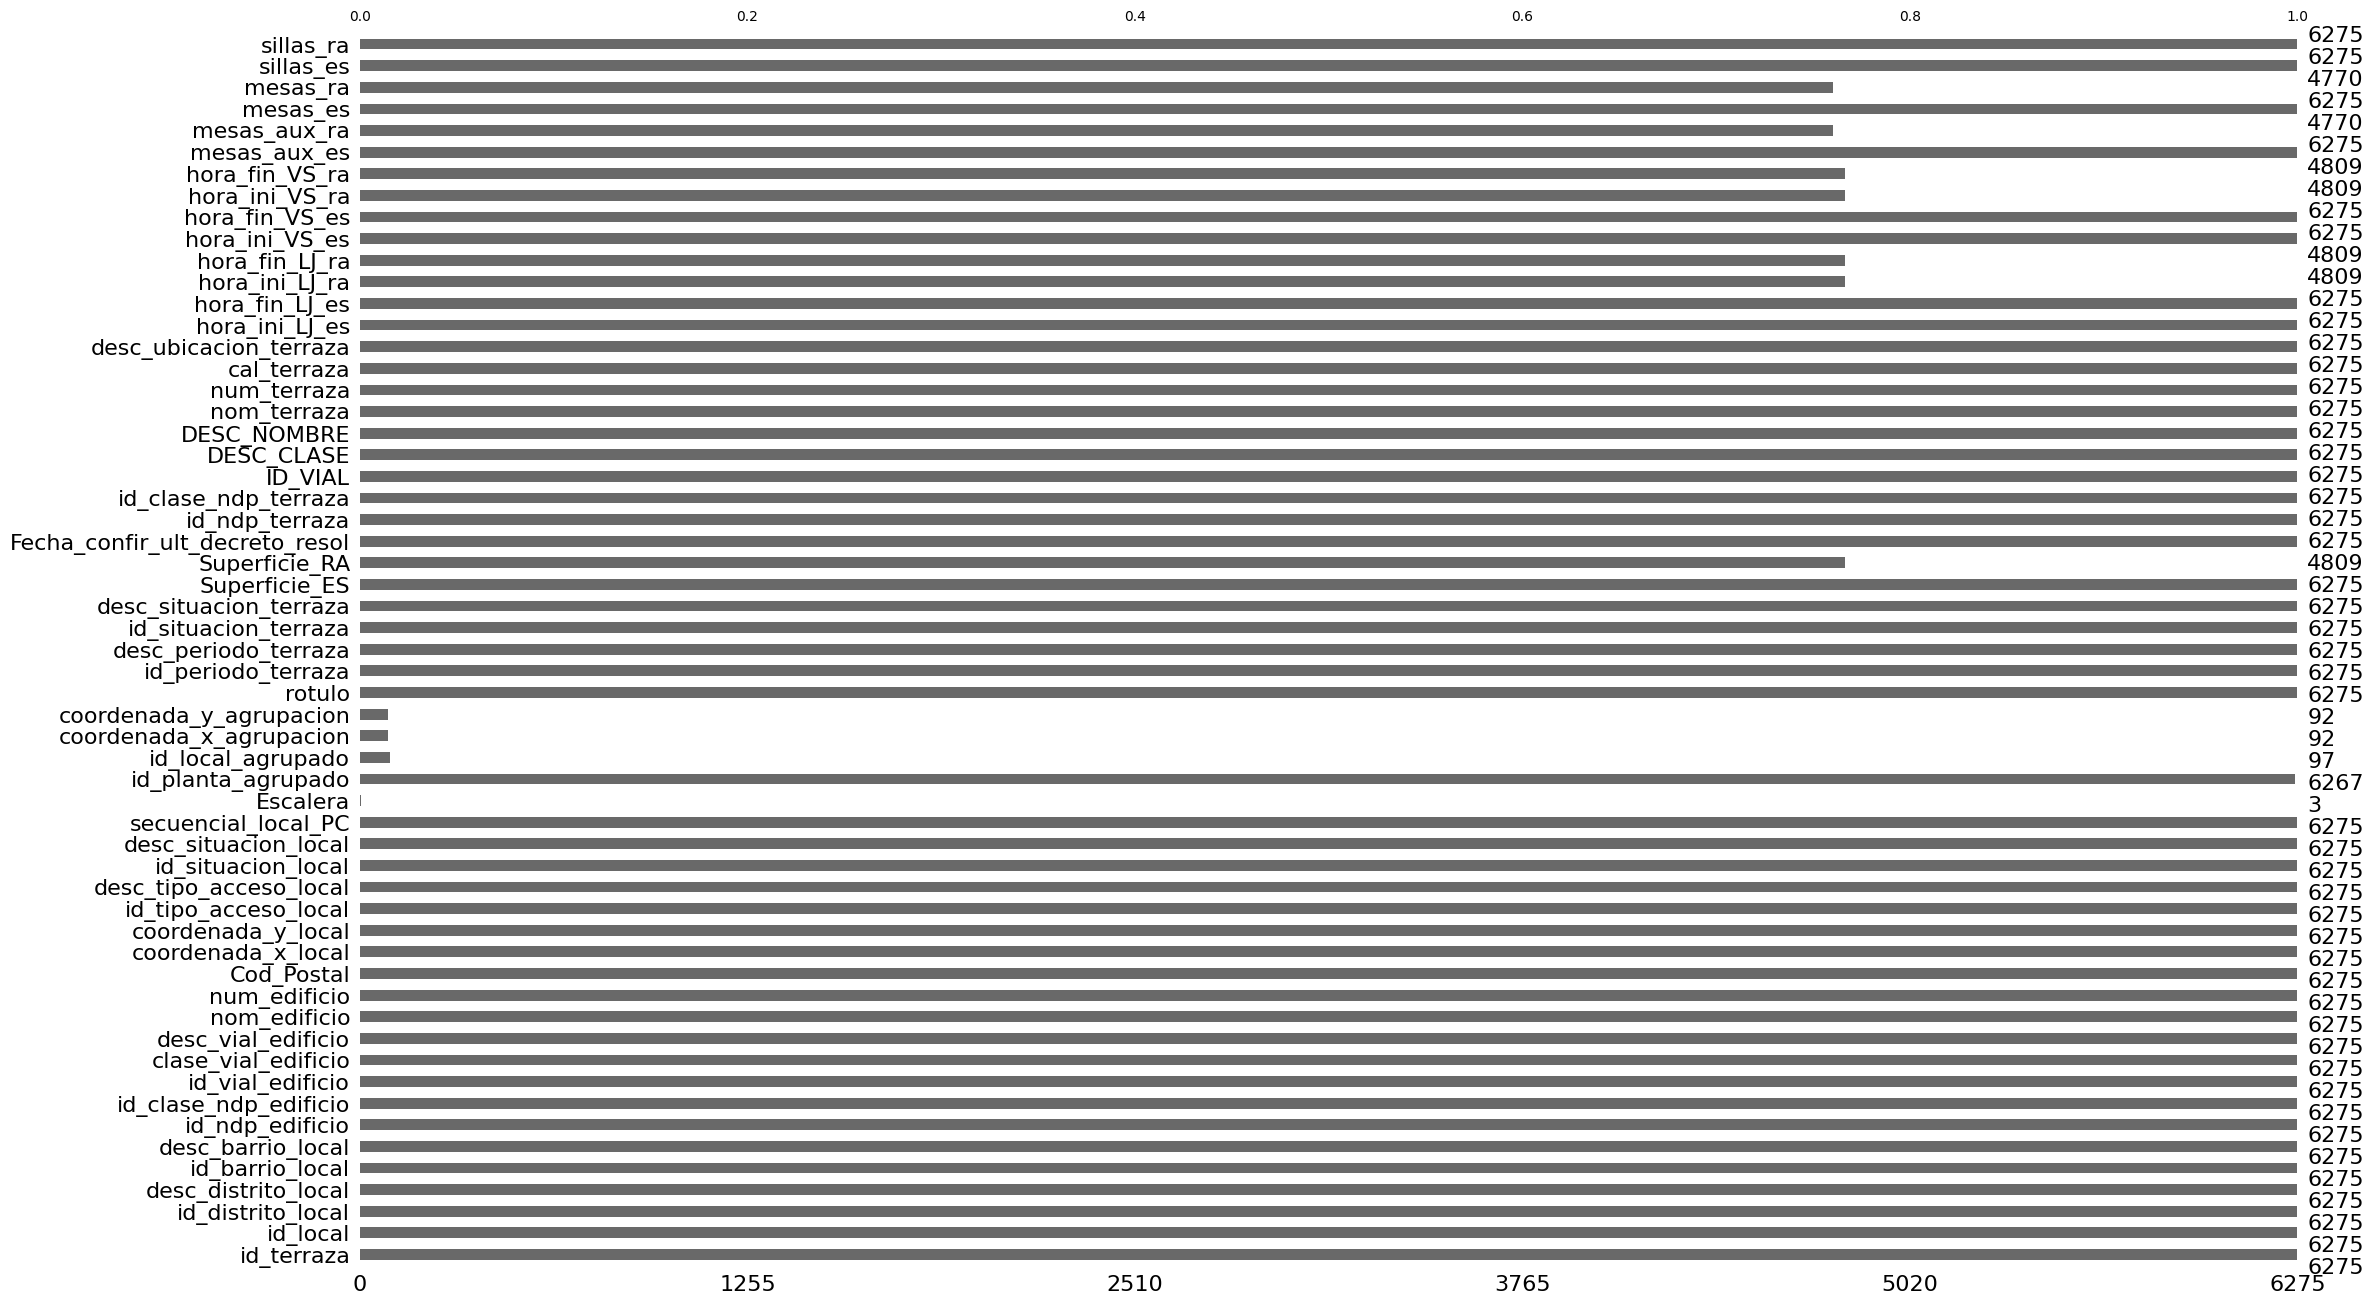

In [7]:
msno.bar(terrazas_pd)

<Axes: >

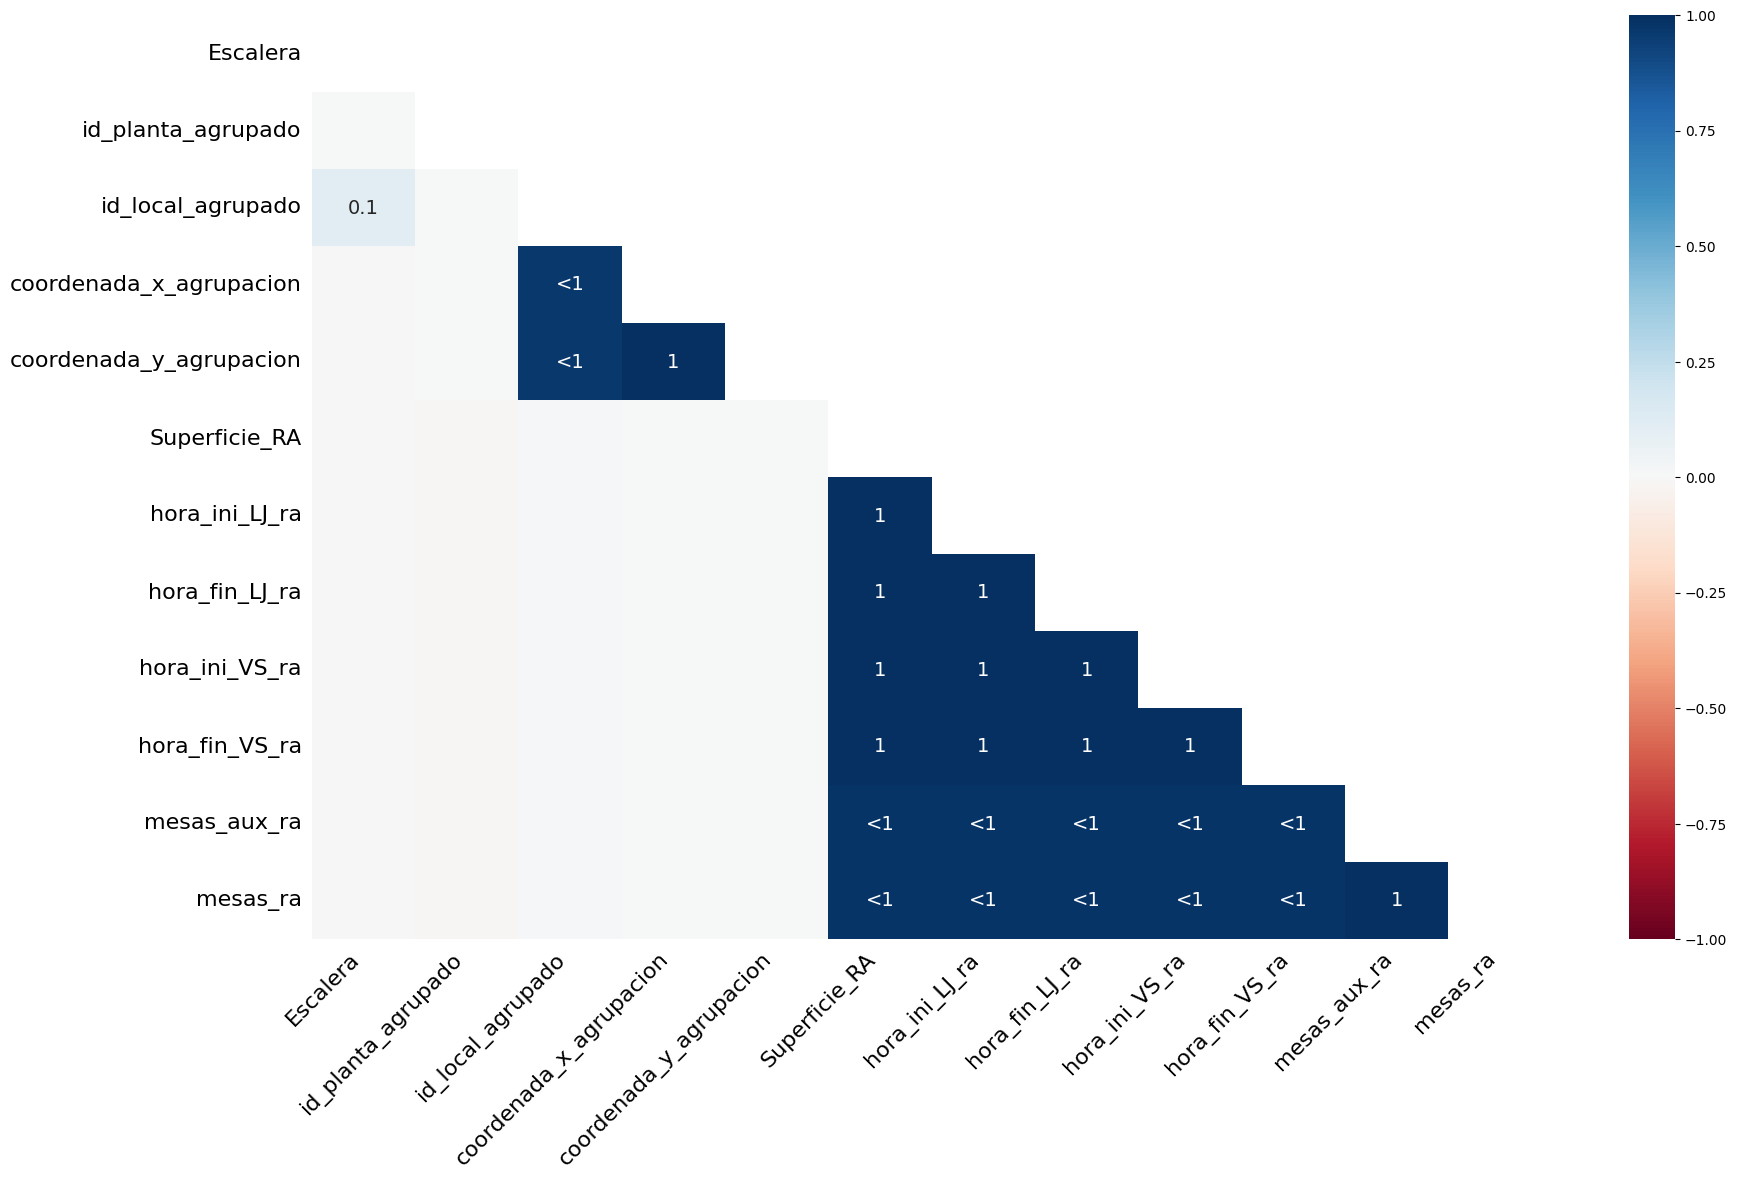

In [8]:
msno.heatmap(terrazas_pd)

<Axes: >

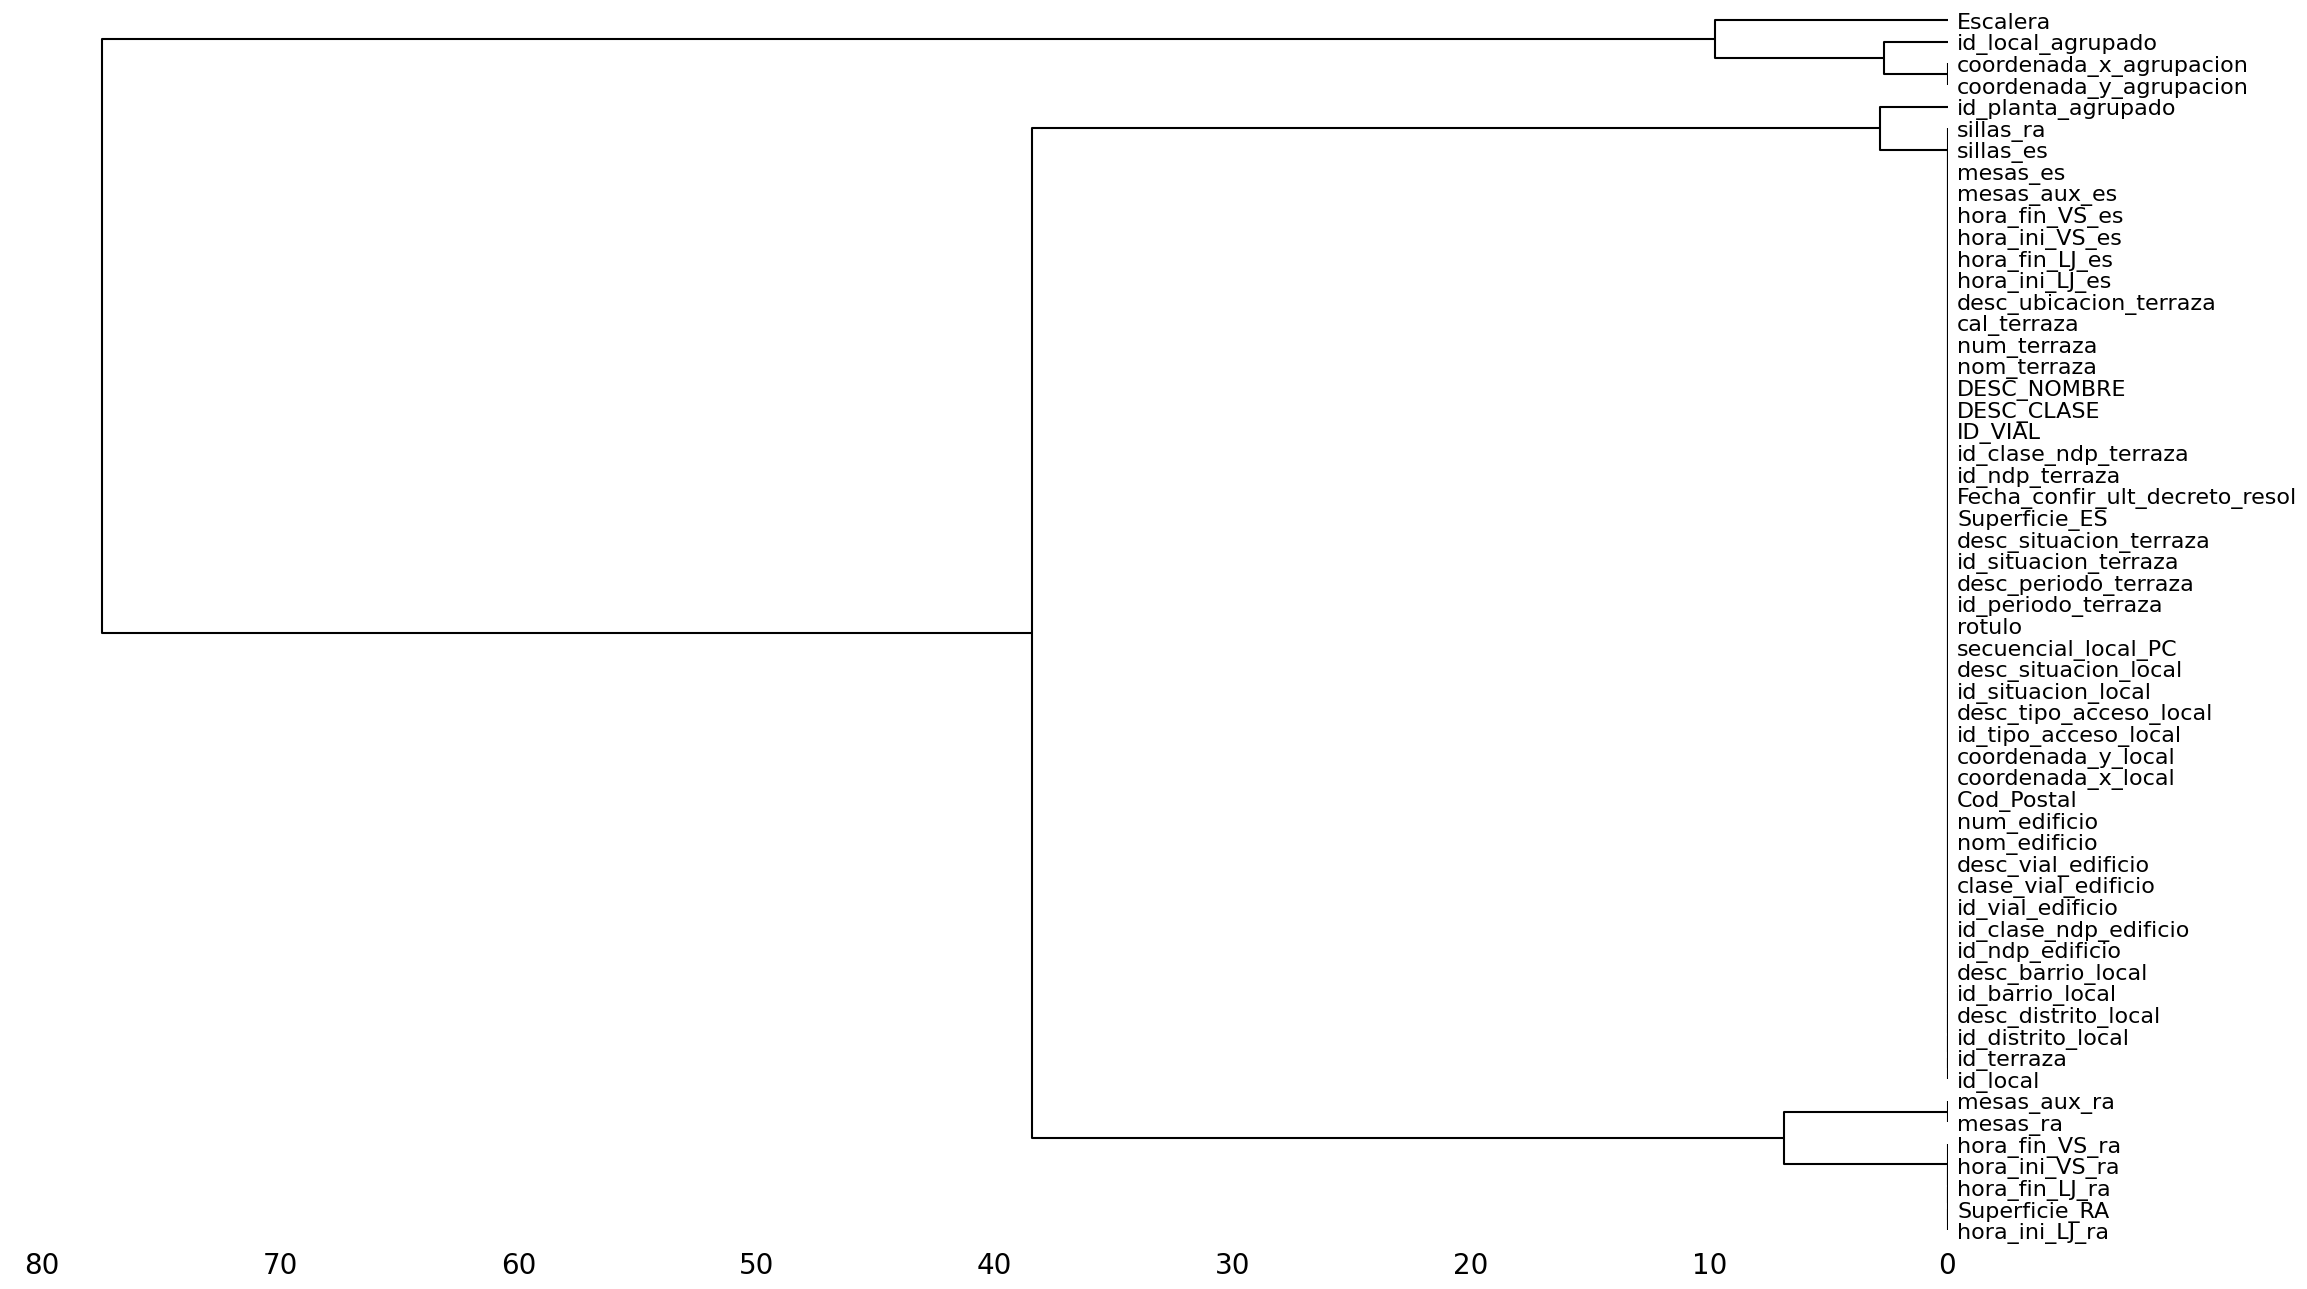

In [9]:
msno.dendrogram(terrazas_pd)

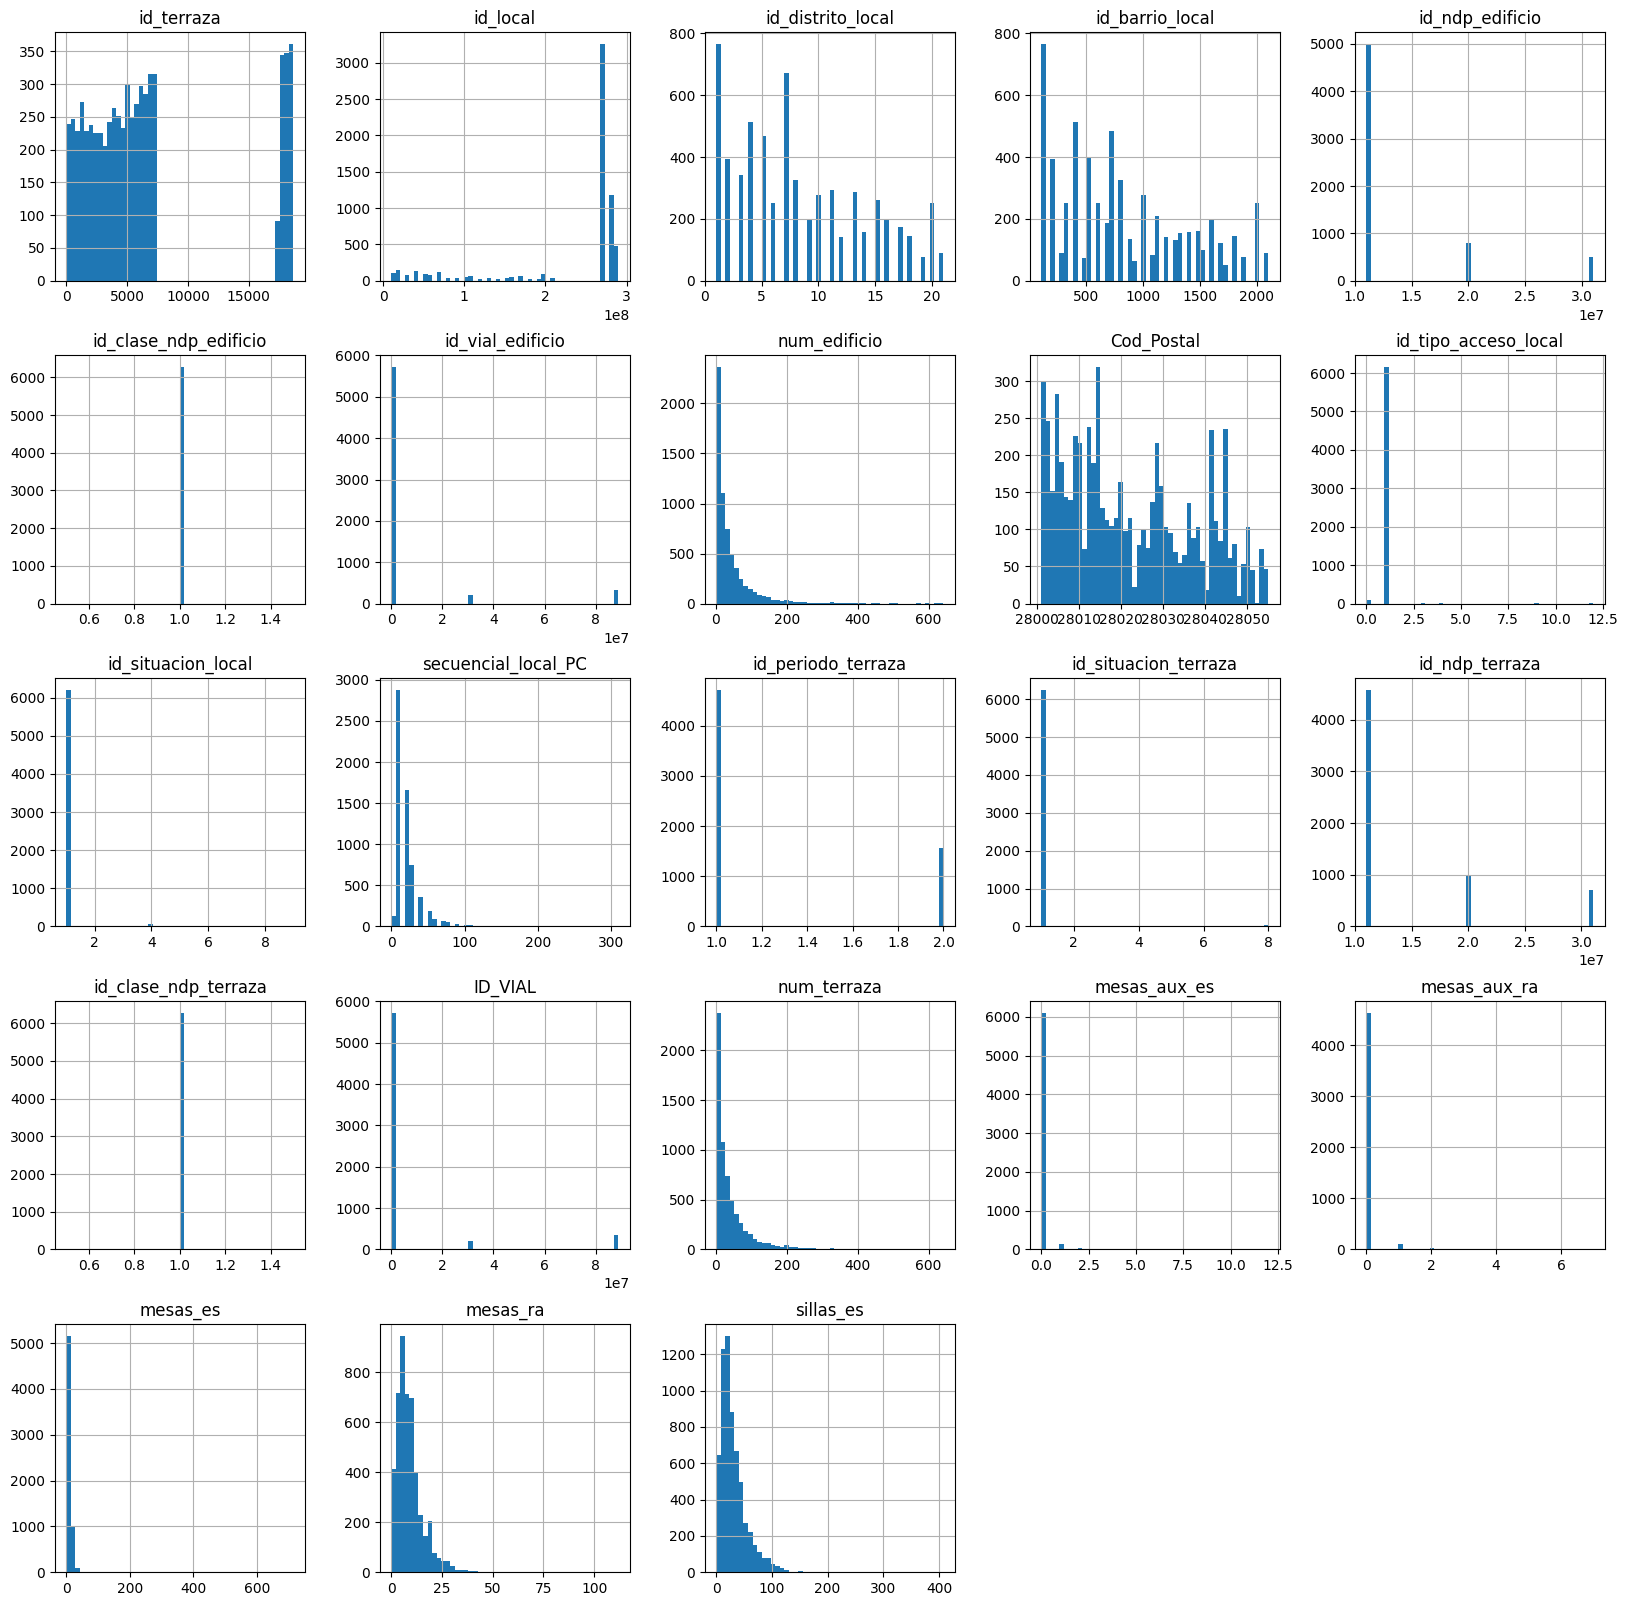

In [10]:
histograma = terrazas_pd.hist(figsize=(20, 20), bins=50)


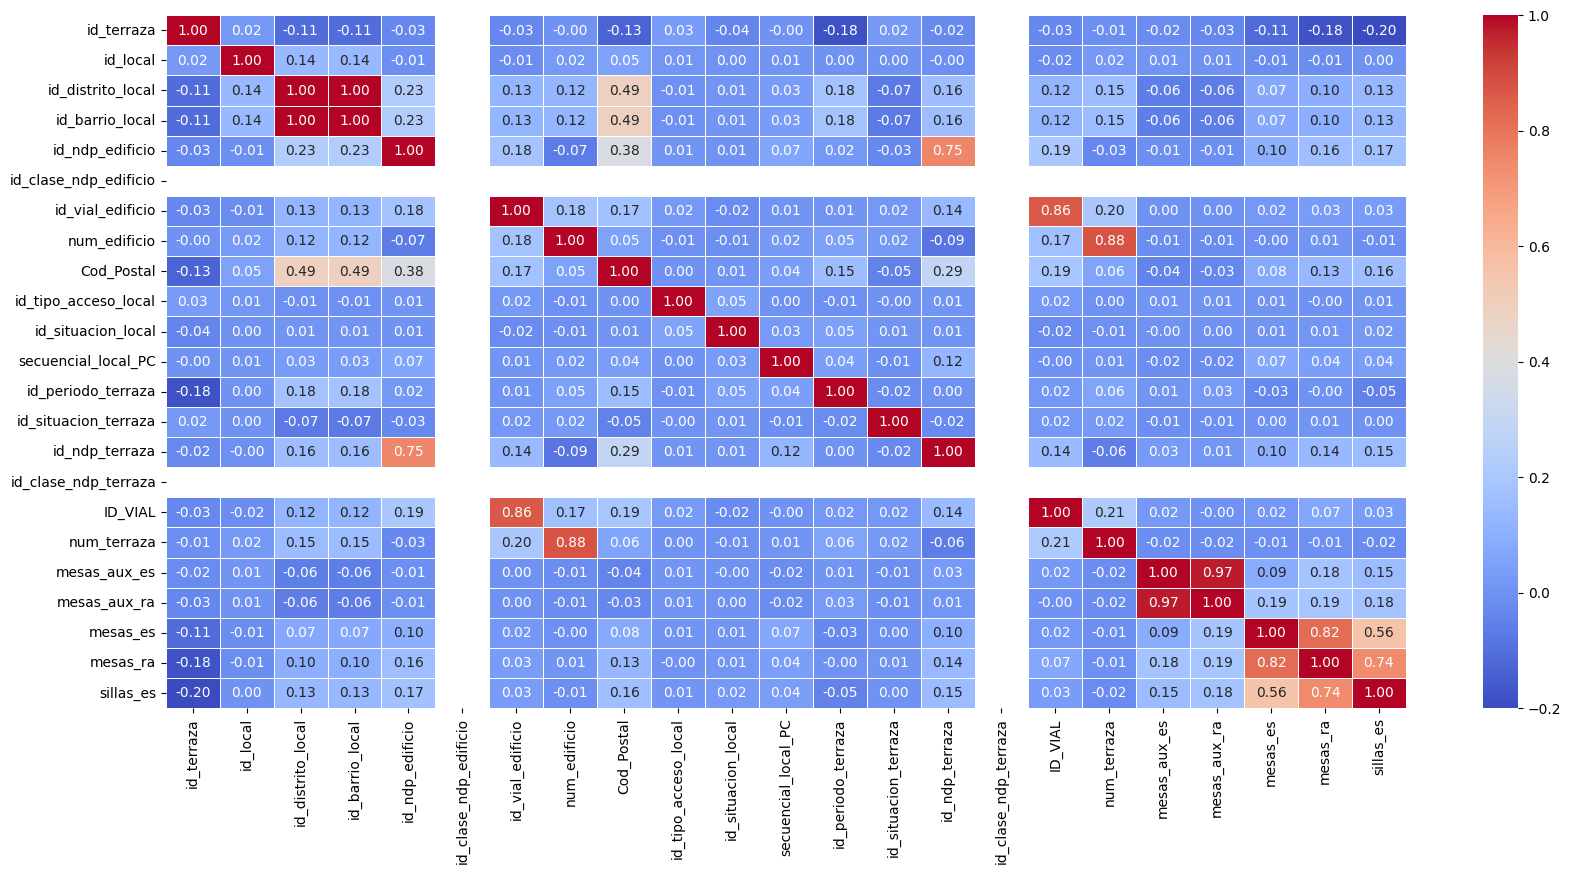

In [11]:
# Filtrar solo columnas numéricas del DataFrame
plt.figure(figsize=(20, 9))
df_numerico = terrazas_pd.select_dtypes(include=['number'])
sns.heatmap(df_numerico.corr(), annot=True, cmap='coolwarm', fmt=".2f",linewidth=.5)
plt.show()

C:\Users\ansab\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


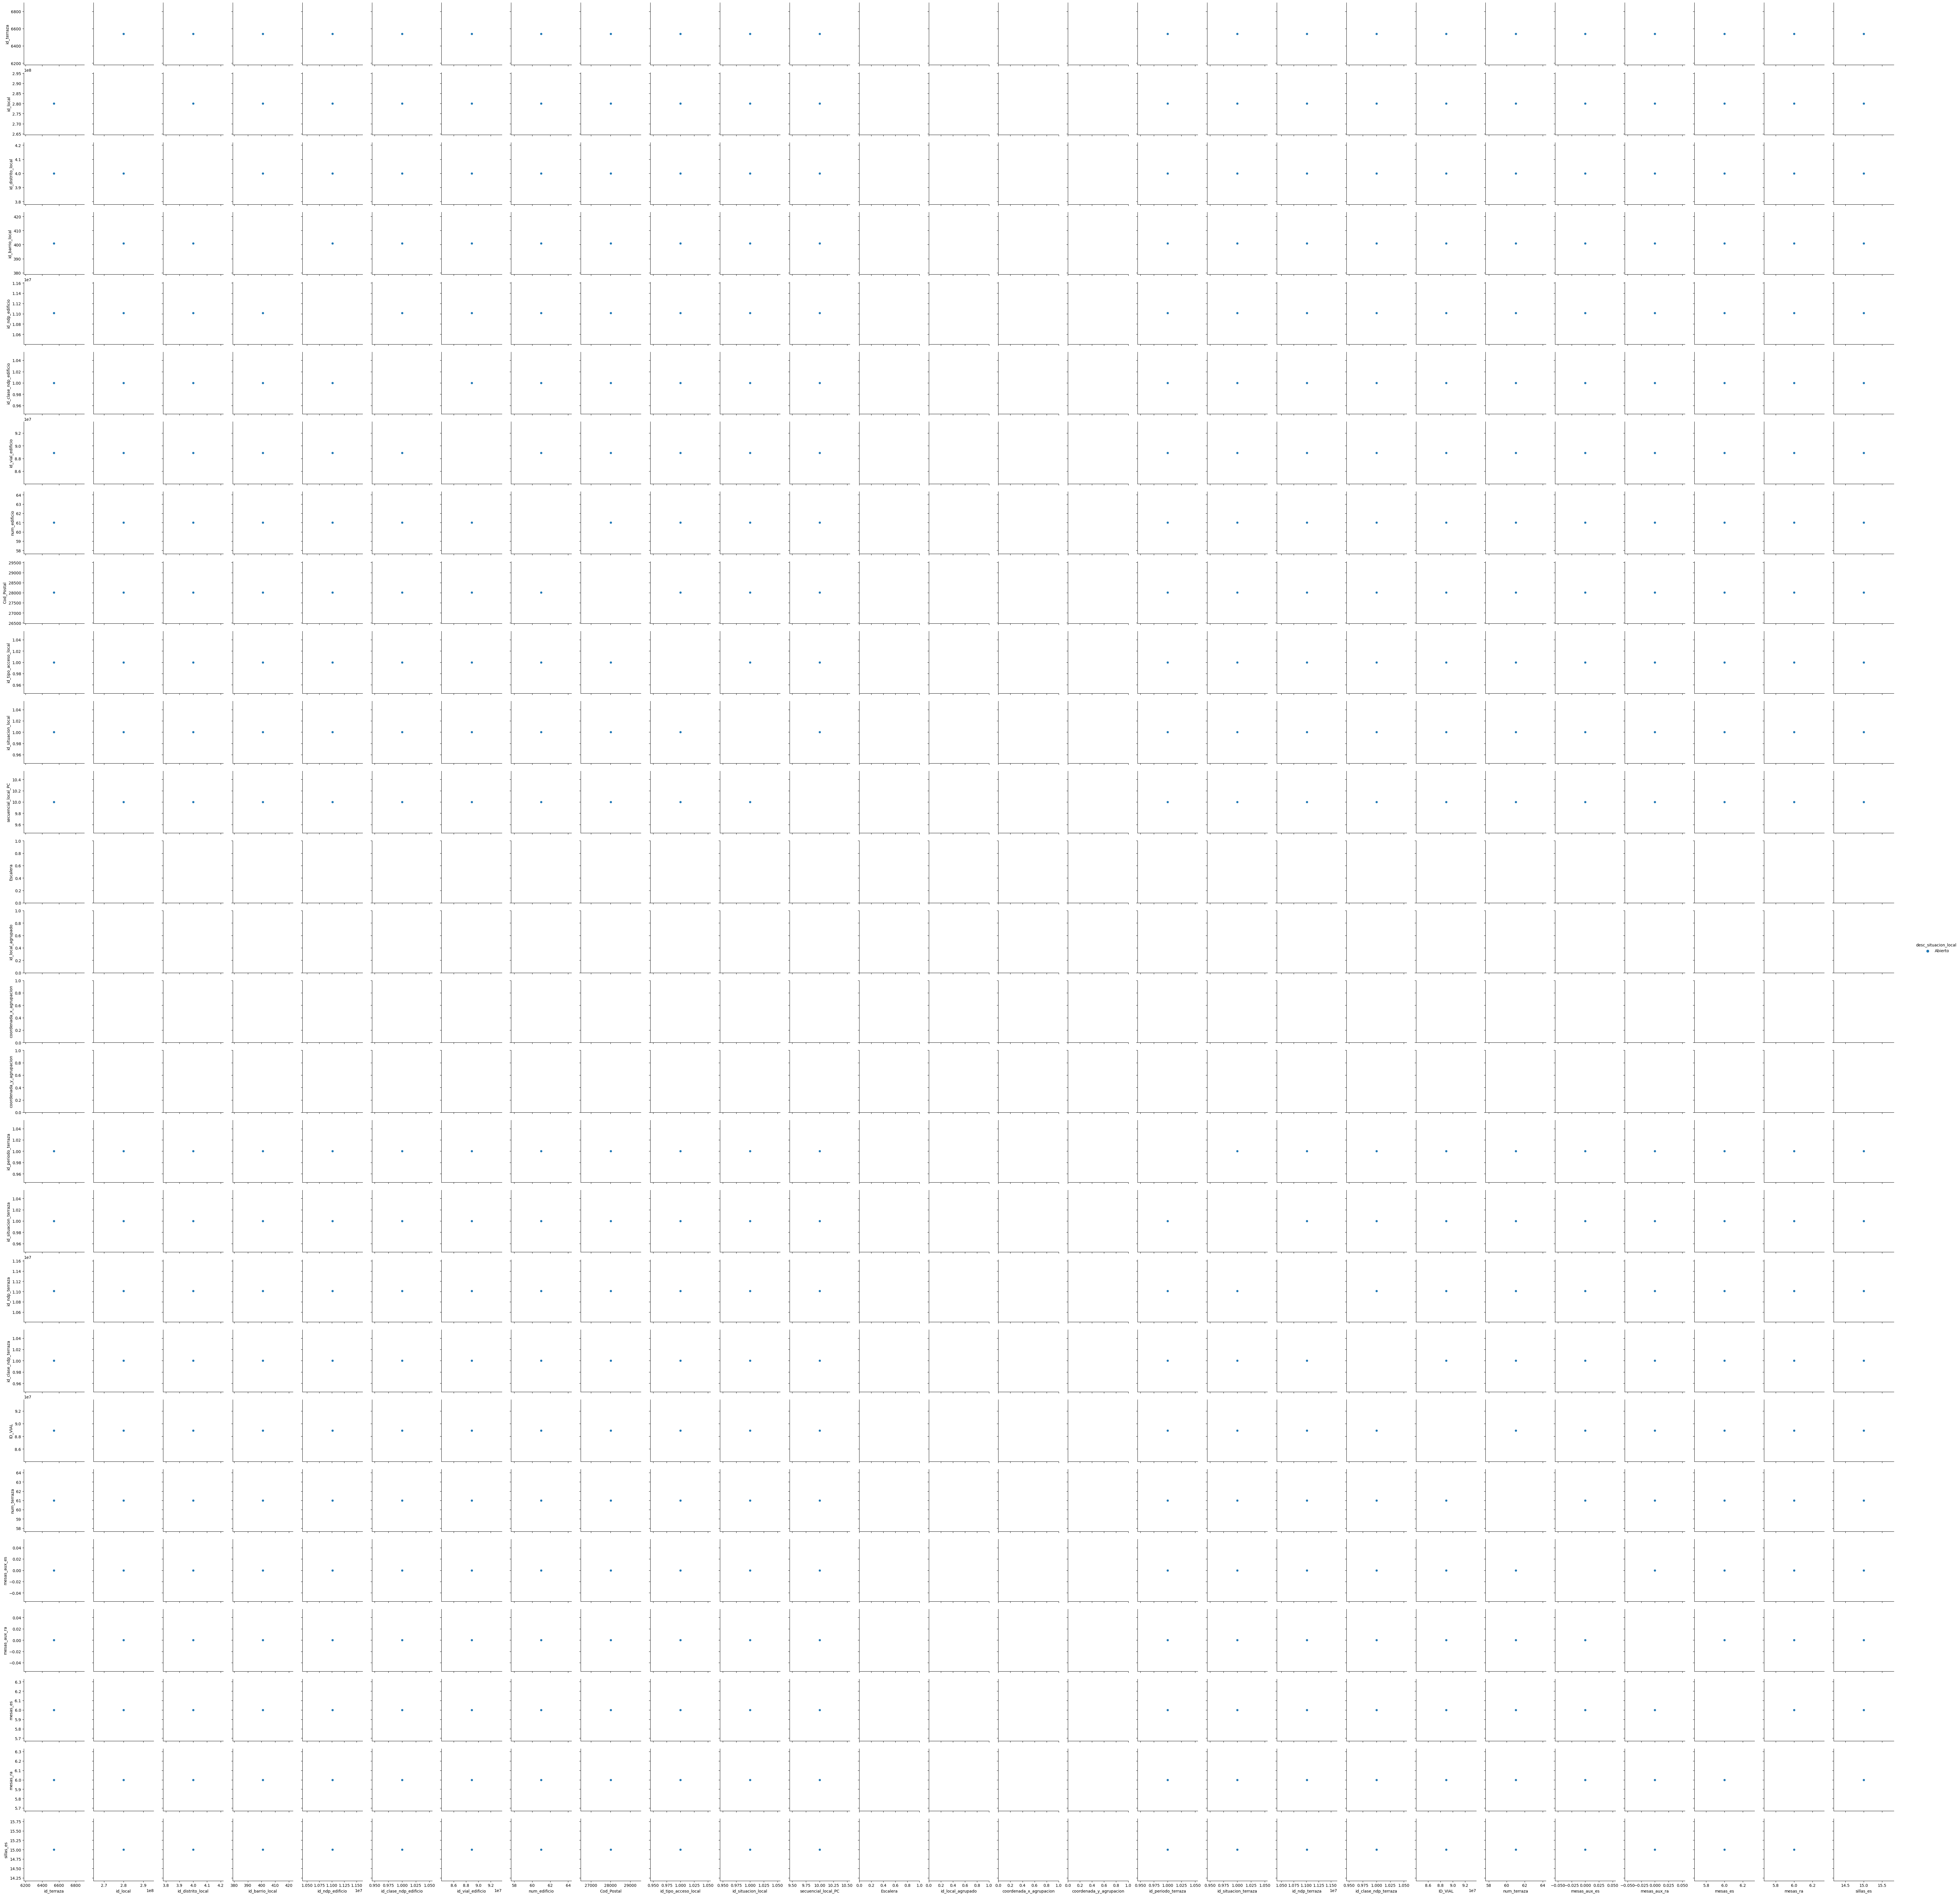

In [12]:
# Tomar una muestra aleatoria del 0.01% de los datos
sample_df = terrazas_pd.sample(frac=0.0001, random_state=1)

# Crear la matriz de gráficos de dispersión
sns.pairplot(sample_df, hue='desc_situacion_local')
plt.show()

In [13]:
# Eliminar columnas sin datos
terrazas_pd_edit = terrazas_pd.drop(['id_clase_ndp_edificio','id_clase_ndp_terraza'], axis=1)
terrazas_pd_edit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6275 entries, 0 to 6274
Data columns (total 55 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id_terraza                      6275 non-null   int64  
 1   id_local                        6275 non-null   int64  
 2   id_distrito_local               6275 non-null   int64  
 3   desc_distrito_local             6275 non-null   object 
 4   id_barrio_local                 6275 non-null   int64  
 5   desc_barrio_local               6275 non-null   object 
 6   id_ndp_edificio                 6275 non-null   int64  
 7   id_vial_edificio                6275 non-null   int64  
 8   clase_vial_edificio             6275 non-null   object 
 9   desc_vial_edificio              6275 non-null   object 
 10  nom_edificio                    6275 non-null   object 
 11  num_edificio                    6275 non-null   int64  
 12  Cod_Postal                      62

In [15]:
# eliminar columnas sin datos relevantes
terrazas_pd_edit = terrazas_pd_edit.drop(['nom_edificio','nom_terraza'], axis=1)